In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [49]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

## -- Reading Data File --

In [50]:
data=pd.read_csv('../Data/Chennai houseing sale.csv')

### -- Checking First 5 records of data --

In [51]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### -- Dropping PRT_ID feature --

In [52]:
data.drop(['PRT_ID'],axis=1,inplace=True)

## -- Checking Duplicate Records in data --

In [53]:
data.duplicated().sum()

0

## -- Checking Features of Dataset --

In [54]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

## -- Checking Dataset size --

In [55]:
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

Rows: 7109
Columns: 21


## -- Checking Number of Missing values in features --

In [56]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

## -- Checking statistic summary of Numeric features in Dataset --

In [57]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


## -- Getting Datatype insights of features present in Dataset --

In [58]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

## -- Getting Unique values of each features --

In [59]:
for features in data.columns:
    print(f"{features}: {data[features].unique()}")

AREA: ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
INT_SQFT: [1004 1986  909 ...  688 2051  598]
DATE_SALE: ['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']
DIST_MAINROAD: [131  26  70  14  84  36 137 176 175  74  78 143  83 157 148 134  69 168
  53  96 114 100 111 105  29  59 185 138 173  15 117  16 130  46 180  52
  86  49 113 189  28  51  19 167 126  75 154  25 187 200  32  11  23  13
  58  89  48  39 177 116  41 192  72  24  43  85 171 149  73  62 145 125
 121 129   6 103   8  50  67   0 147  71  34 178 106 144 135  38  40 142
  79  20  99 166  63  44  60  90 169  10 122 108  98  57 104  17   1 109
 164 136  97  37   9 181  93  81 193  95 196 141 158 174  94 124  82  76
 190 194  54  64  65 153 115 102  77 182 163  88  66 119  18 188 112 120
 159   4 123  31   2 156 184 170 110   7 152  27 198 183  12  45 16

## -- Getting object datatype features of dataset --

In [60]:
obj_features=[features for features in data.columns if data[features].dtypes=='object' and 'DATE' not in features]
obj_features

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

## -- Fixing redundancy of values in object datatype features --

In [61]:
val_dict={'AREA':{'Karapakkam':['Karapakam'], 'Anna Nagar':['Ana Nagar', 'Ann Nagar'], 'Adyar':['Adyr'], 'Velachery':['Velchery'], 
 'Chrompet':['Chrompt', 'Chrmpet', 'Chormpet'], 'KK Nagar':['KKNagar'],'T Nagar': ['TNagar']},
'SALE_COND':{'AbNormal':['Ab Normal'], 'Partial':['Partiall', 'PartiaLl'], 'AdjLand':['Adj Land']},
'PARK_FACIL': {'No':['Noo']},
'BUILDTYPE':{'Commercial':['Comercial'], 'Others': ['Other']},
'UTILITY_AVAIL': {'AllPub':['All Pub'], 'NoSewa': ['NoSewr ','NoSwer','NoSeWa'], },
'STREET': {'Paved':['Pavd'], 'No Access':['NoAccess']}

}

In [62]:
for feature in val_dict:
    for classes in val_dict[feature]:
        for val in val_dict[feature][classes]:
            data[feature]=data[feature].replace(val,classes)

In [63]:
for feature in data.columns:
    print(f'{feature}: {data[feature].unique()}')

AREA: ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
INT_SQFT: [1004 1986  909 ...  688 2051  598]
DATE_SALE: ['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']
DIST_MAINROAD: [131  26  70  14  84  36 137 176 175  74  78 143  83 157 148 134  69 168
  53  96 114 100 111 105  29  59 185 138 173  15 117  16 130  46 180  52
  86  49 113 189  28  51  19 167 126  75 154  25 187 200  32  11  23  13
  58  89  48  39 177 116  41 192  72  24  43  85 171 149  73  62 145 125
 121 129   6 103   8  50  67   0 147  71  34 178 106 144 135  38  40 142
  79  20  99 166  63  44  60  90 169  10 122 108  98  57 104  17   1 109
 164 136  97  37   9 181  93  81 193  95 196 141 158 174  94 124  82  76
 190 194  54  64  65 153 115 102  77 182 163  88  66 119  18 188 112 120
 159   4 123  31   2 156 184 170 110   7 152  27 198 183  12  45 161  30
 118  33  61 191 160 140  47 146 128  80  55 151   3  92  22  35 101 127
 199 132  21 107  56 197 1

## -- Getting Numeric Datatype Feature --

### -- Getting Categorical Numeric Datatype Features --

In [64]:
catnum_features=[features for features in data.columns if len(data[features].unique())<25 and data[features].dtypes!='object']
catnum_features

['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']

### -- Getting Continuous Numeric Datatype Features --

In [65]:
cnum_features=[features for features in data.columns if data[features].dtypes!='object' and features not in catnum_features]
cnum_features

['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'SALES_PRICE']

## -- Getting Temporal datatype features --

In [66]:
temp_features=[features for features in data.columns if 'DATE' in features]
temp_features

['DATE_SALE', 'DATE_BUILD']

# -- Data Visualization --

### -- Getting correlation between features --

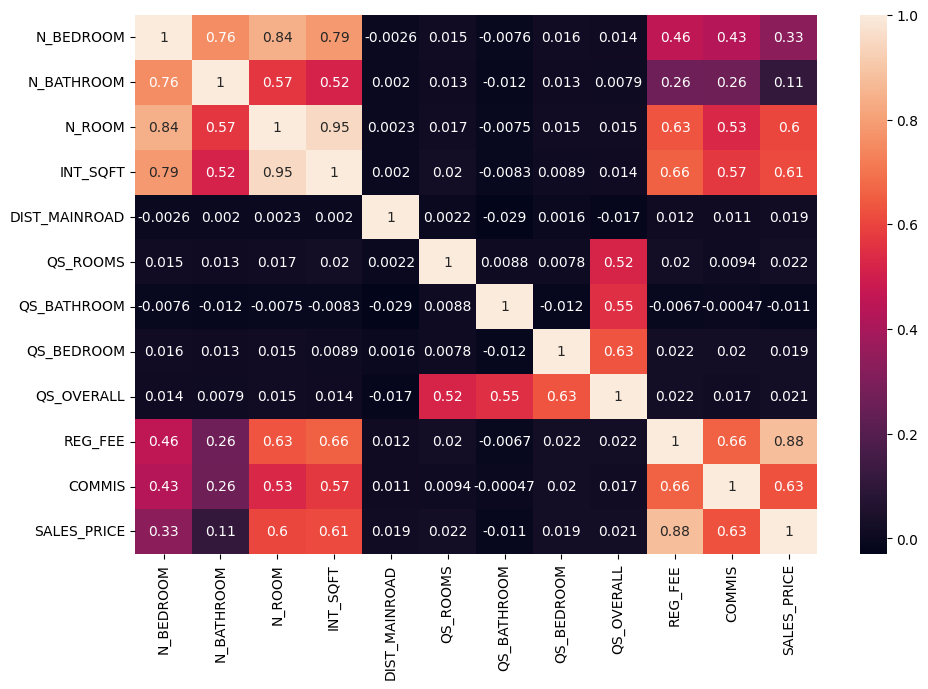

In [67]:
plt.subplots(figsize=(11,7))
sns.heatmap(data[catnum_features+cnum_features].corr(),annot=True)
plt.show()

#### Insights:
    Following feature has very least impact on target feature (SALES_PRICE):
    - DIST_MAINROAD
    - QS_ROOMS
    - QS_BATHROOM
    - QS_BEDROOM
    - QS_OVERALL

## -- Univariate analysis --

### -- Checking frequency of each Class of values in object datatype features --

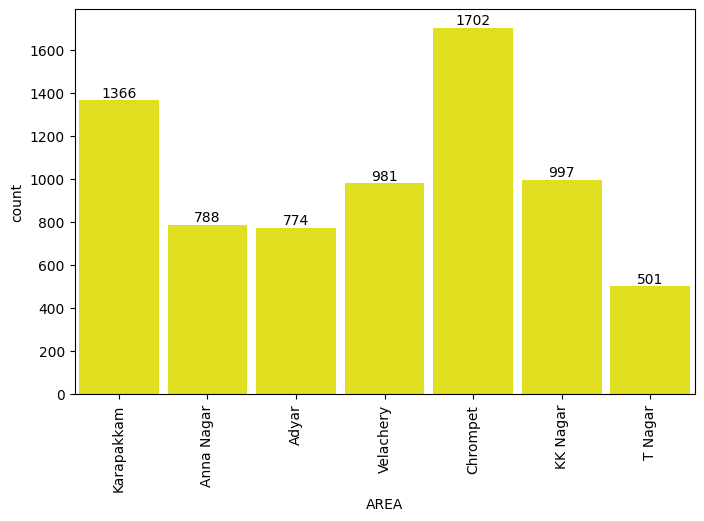

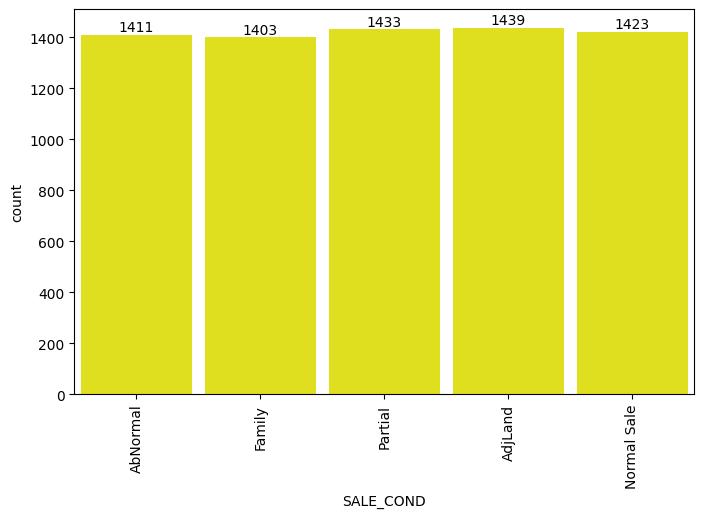

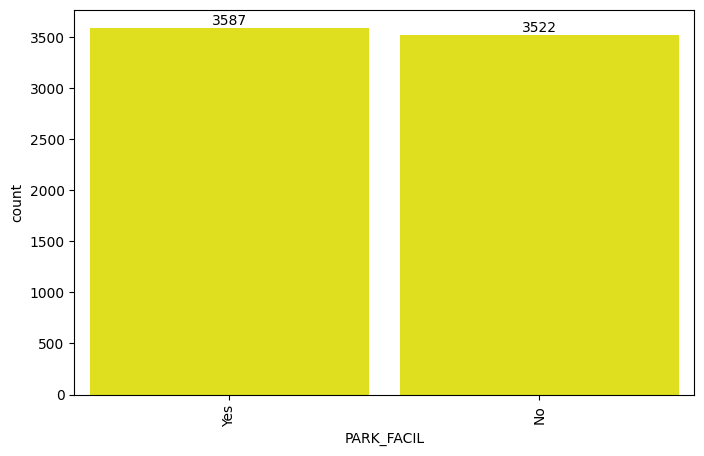

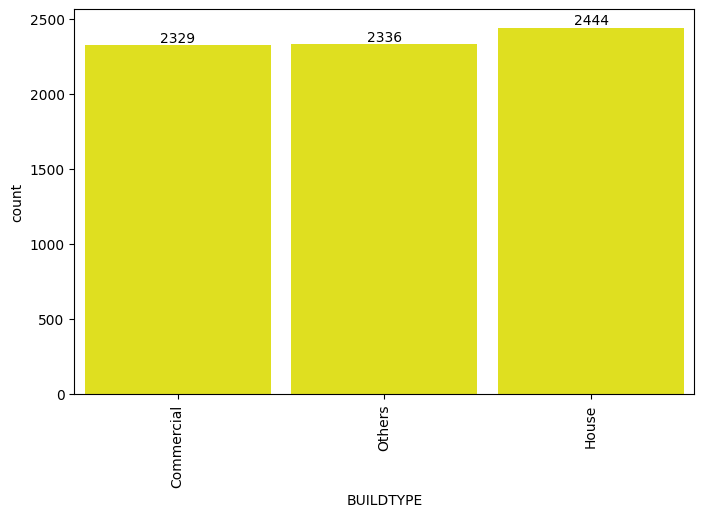

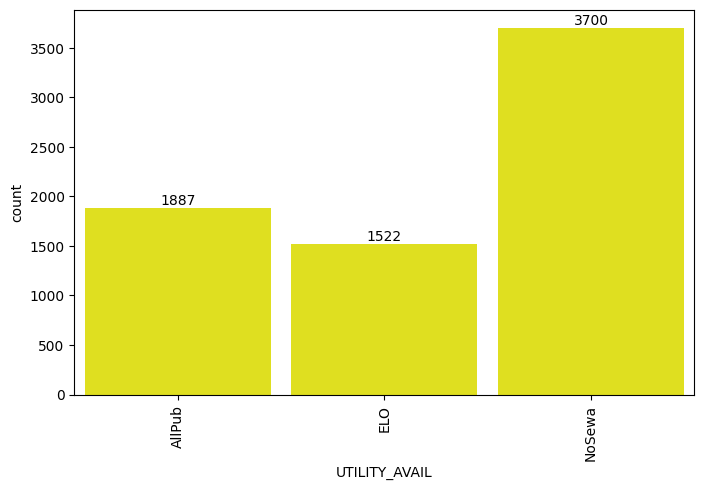

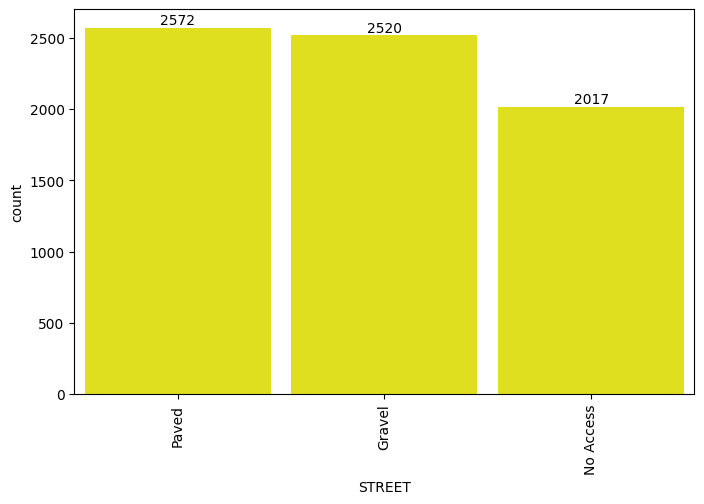

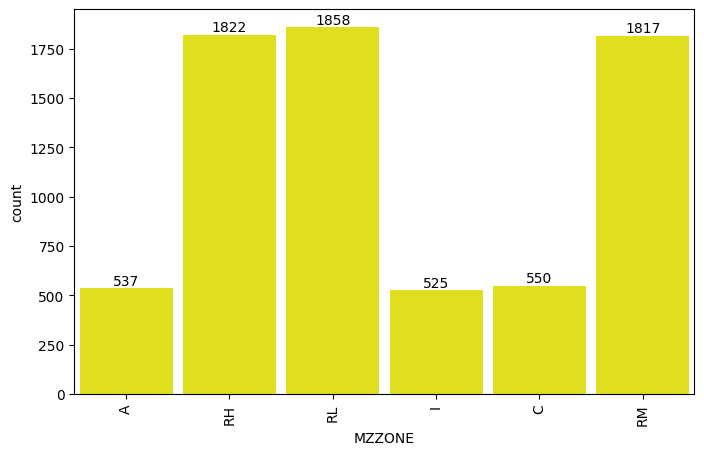

In [68]:
for feature in obj_features:
    plt.subplots(figsize=(8,5))
    ax=sns.countplot(data,x=feature,width=0.9,color='yellow')
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    plt.show()

#### Insights:
    Same class has duplicate records due to Spelling mistakes

### --- Checking percentage of each value class in object datatype features

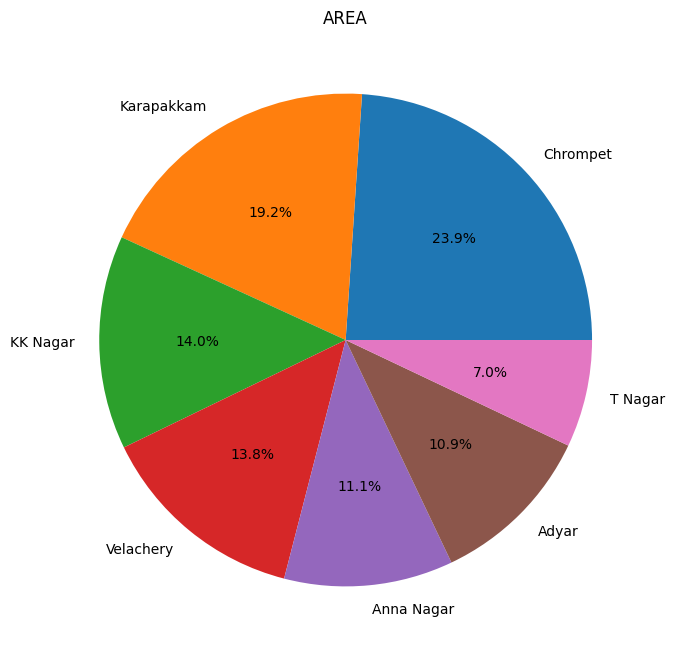

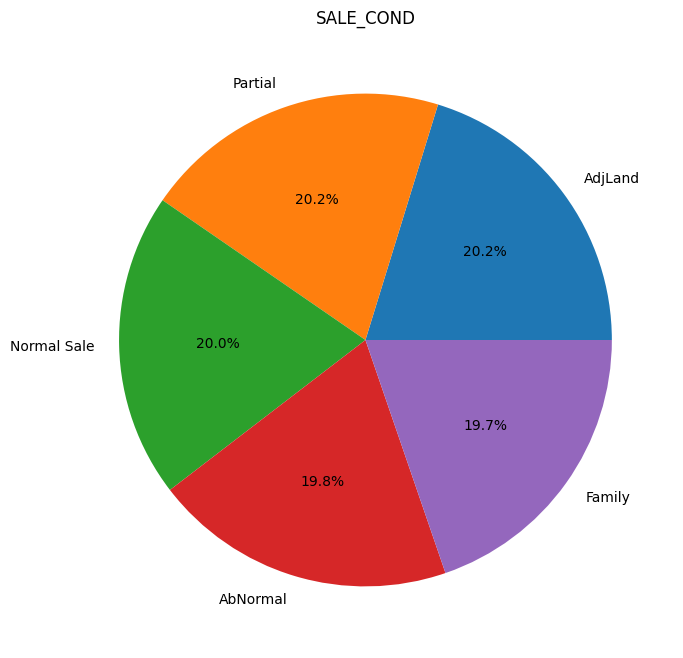

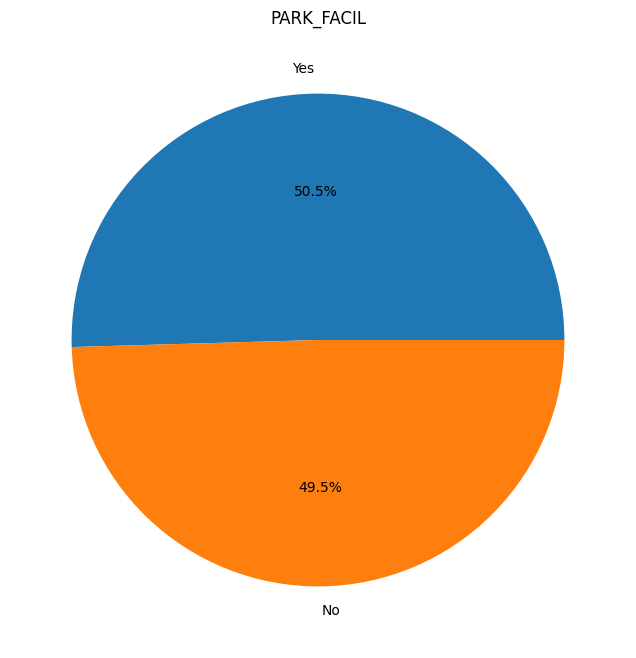

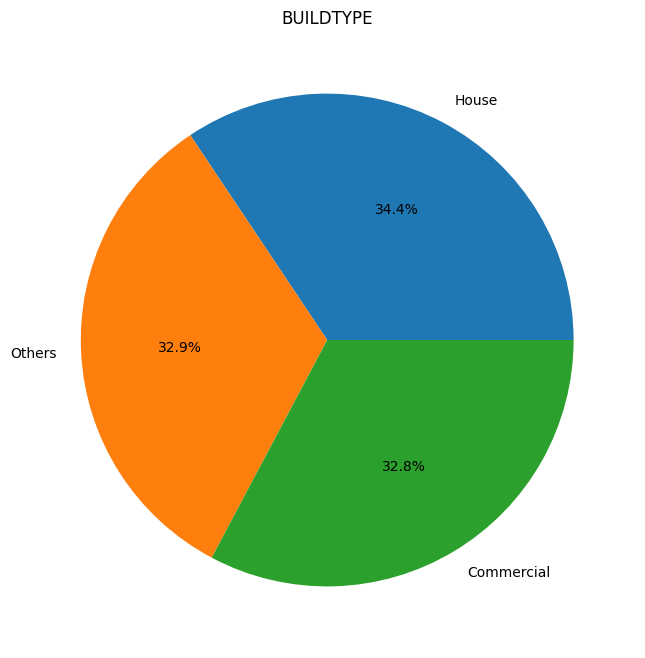

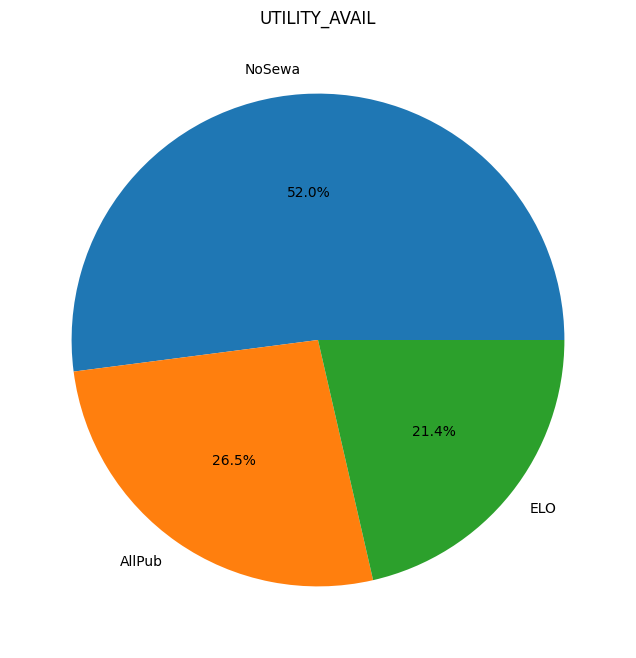

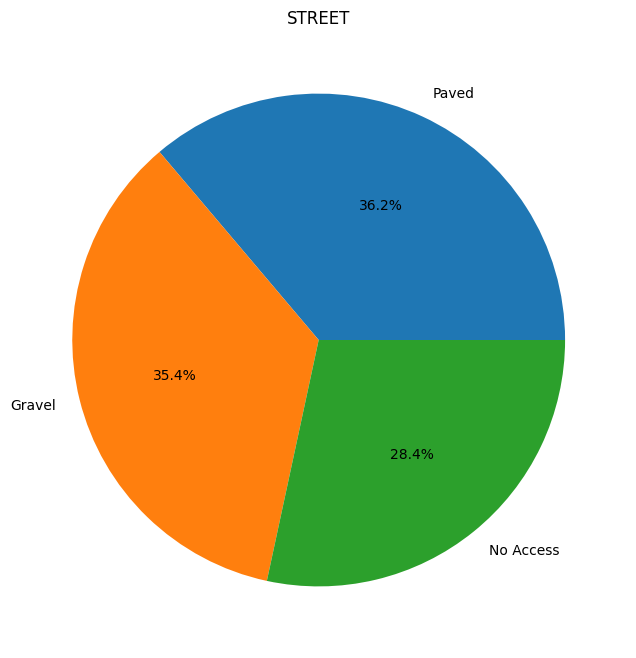

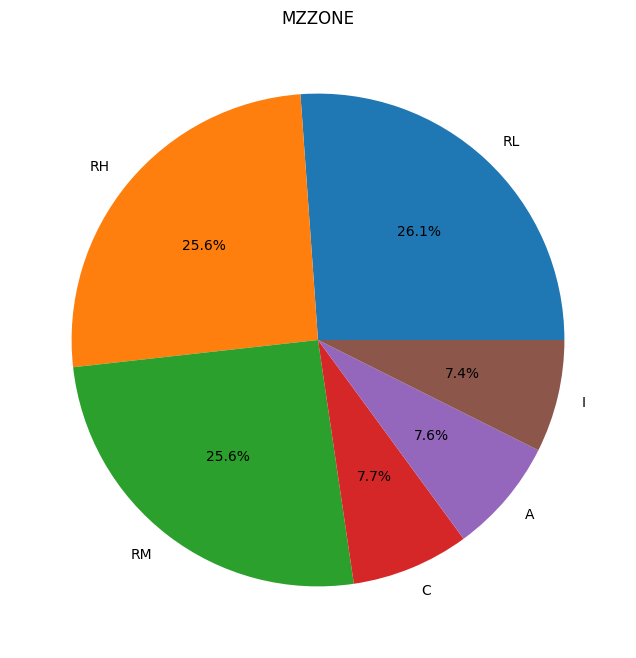

In [69]:
for feature in obj_features:
    plt.subplots(figsize=(8,8))
    plt.pie(data[feature].value_counts(),labels=data[feature].value_counts().index,autopct="%1.1f%%")
    plt.title(feature)
    plt.show()

### -- Checking frequency of each Class of values in Numeric datatype features --

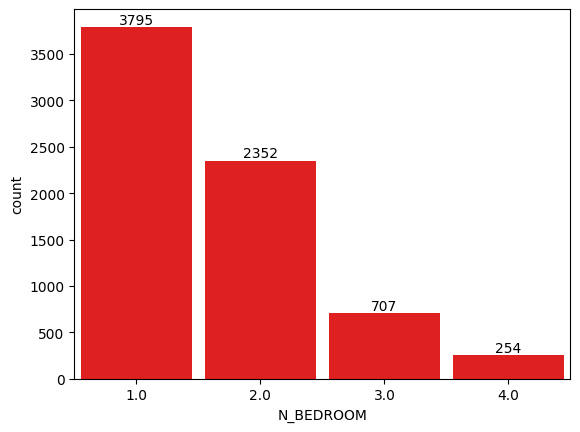

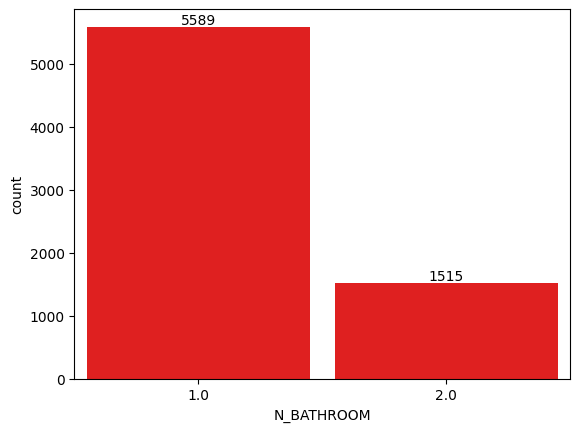

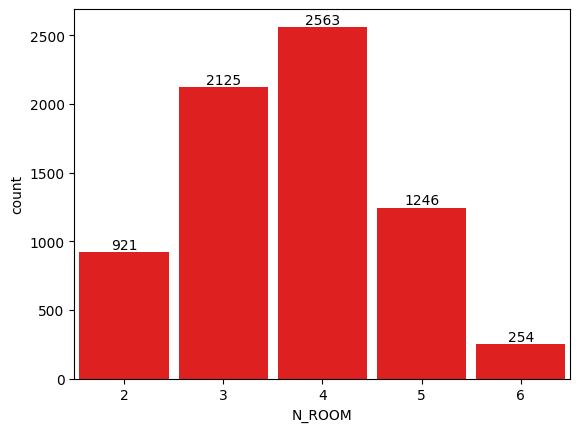

In [70]:
for features in catnum_features:
    ax=sns.countplot(data,x=features,width=0.9,color='red')
    ax.bar_label(ax.containers[0])
    plt.show()

### --- Checking percentage of each value class in Numeric categorical datatype features

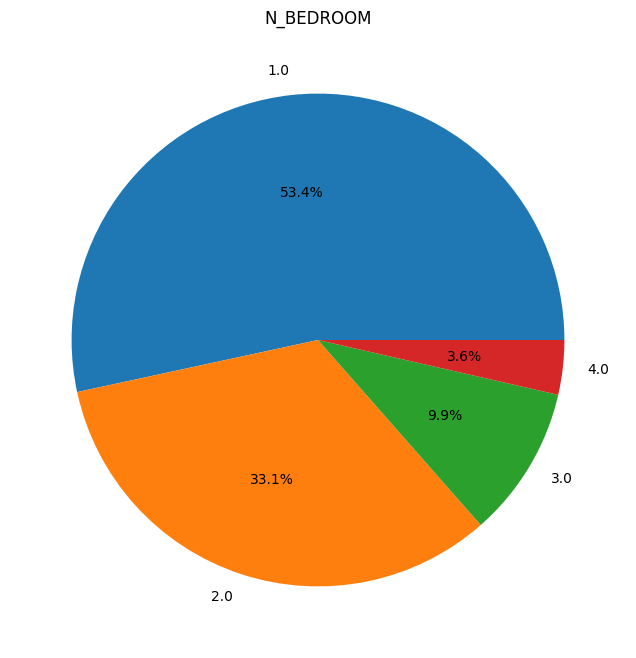

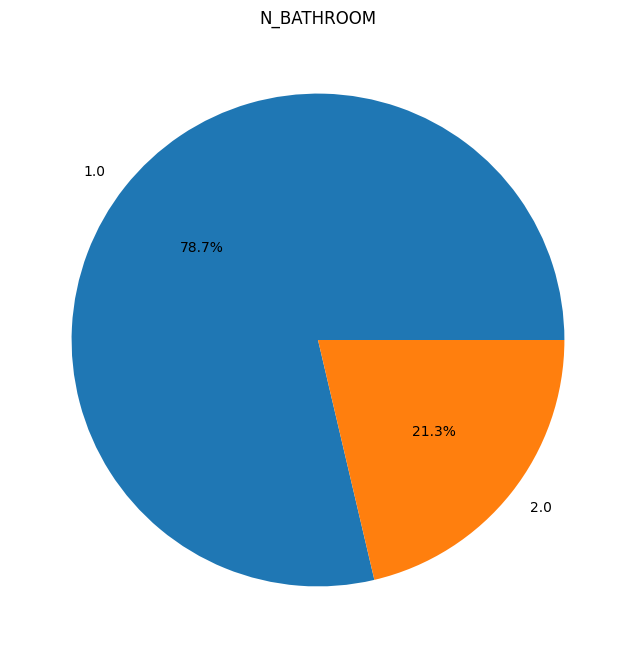

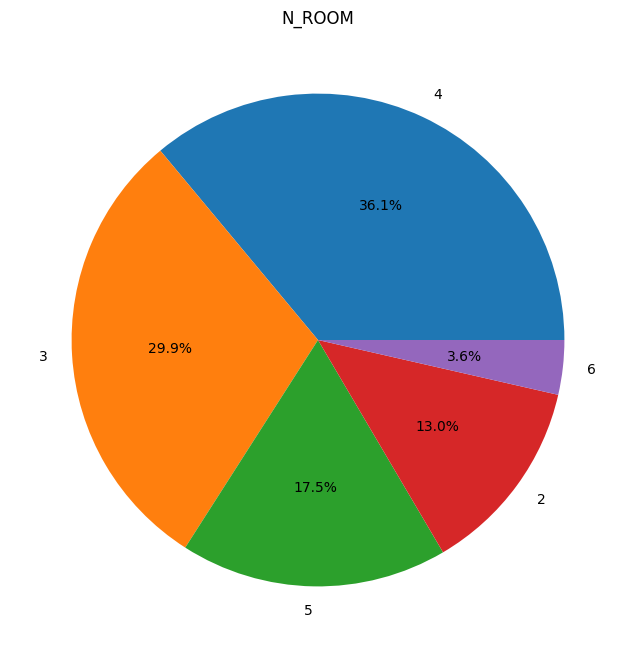

In [71]:
for feature in catnum_features:
    plt.subplots(figsize=(8,8))
    plt.pie(data[feature].value_counts(),labels=data[feature].value_counts().index,autopct="%1.1f%%")
    plt.title(feature)
    plt.show()

### -- Checking distribution of continuous numerical data --

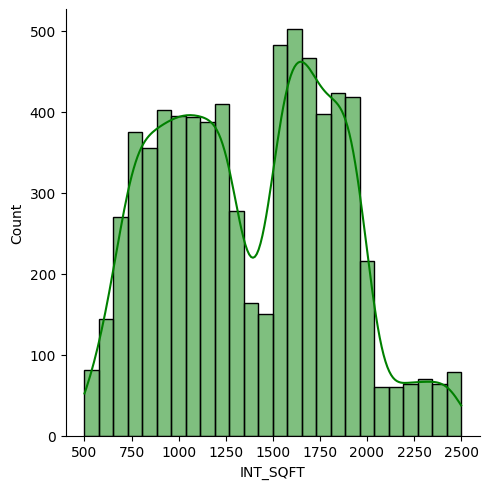

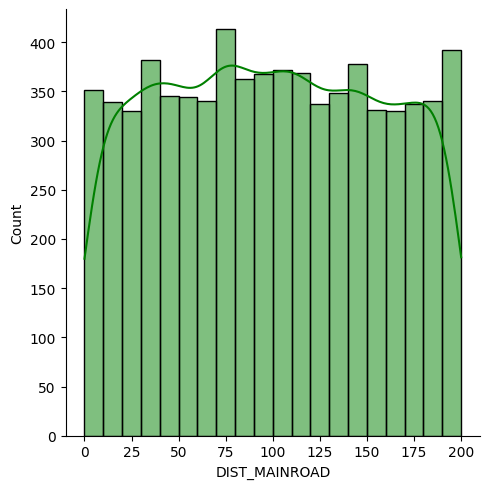

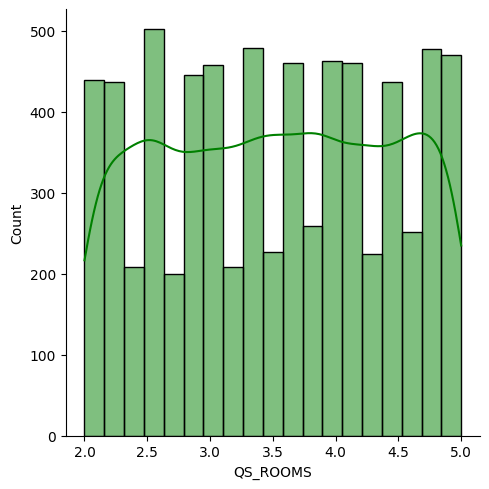

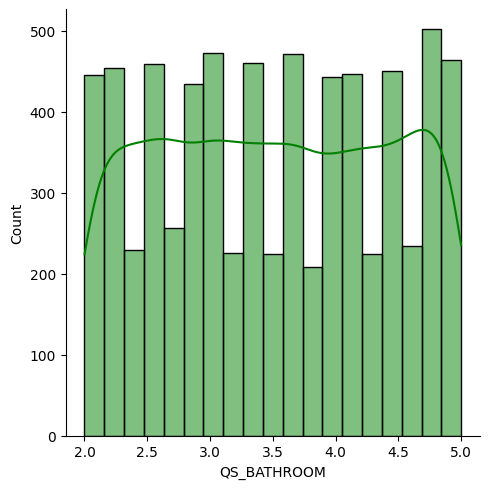

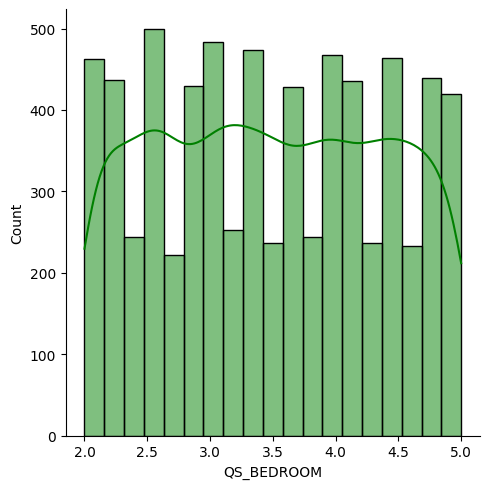

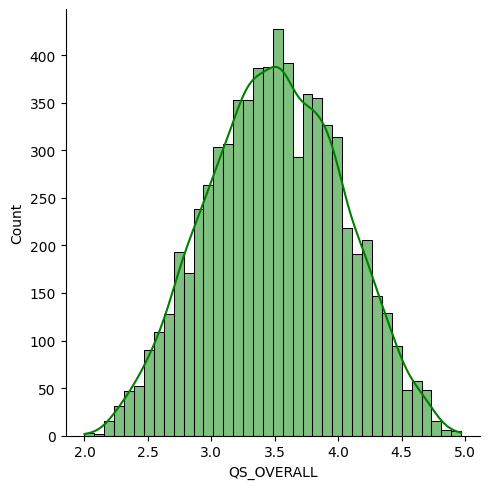

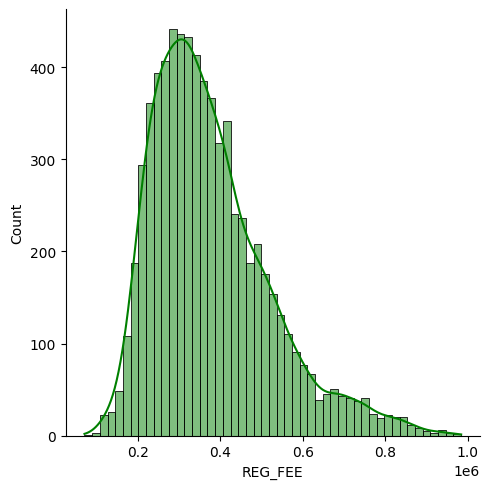

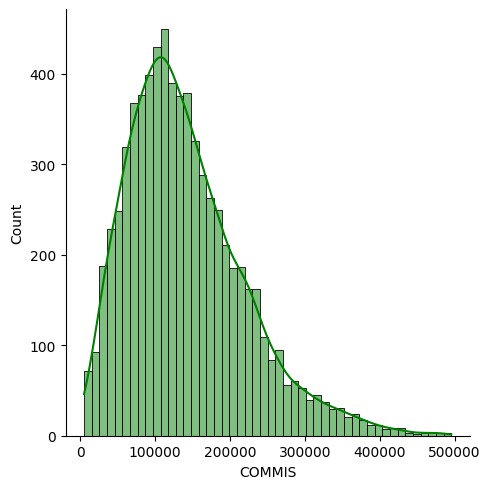

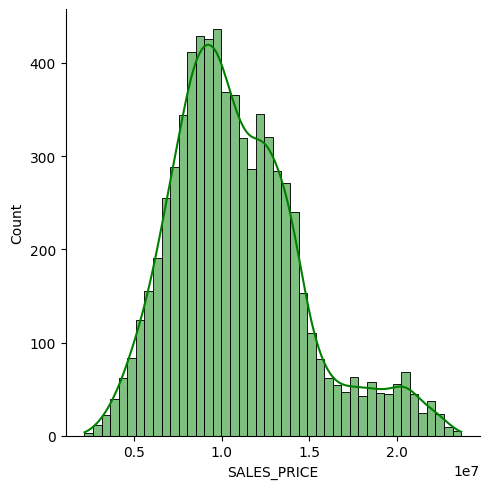

In [72]:
for features in cnum_features:
    sns.displot(data,x=features,color='green',kde=True)
    plt.show()

#### Insights:
    - QS_overall feature has perfect Gaussian distribution
    - REG_FEE, COMMIS feature has right skewed data distribution

### -- Checking outliers in Continuous Numerical Features --

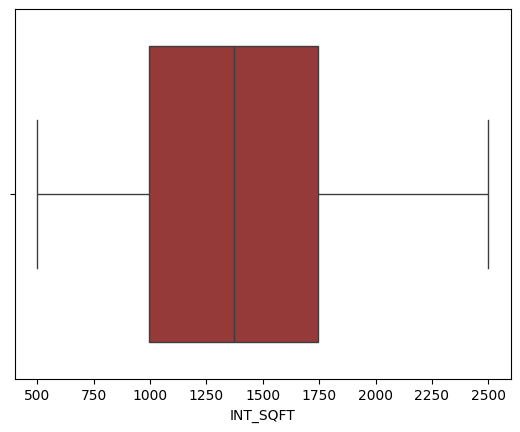

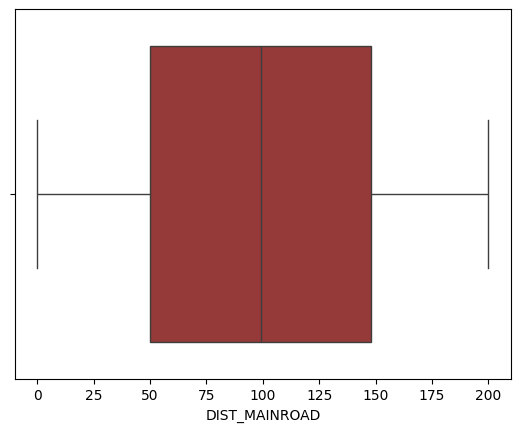

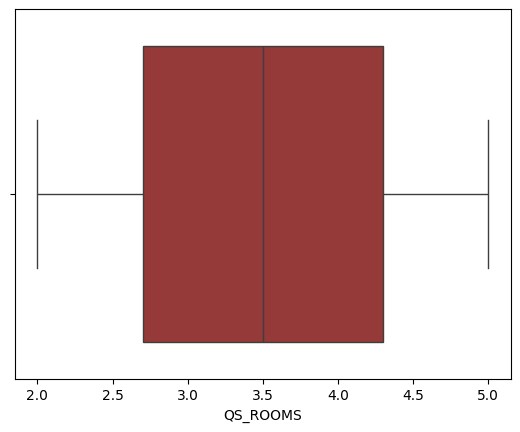

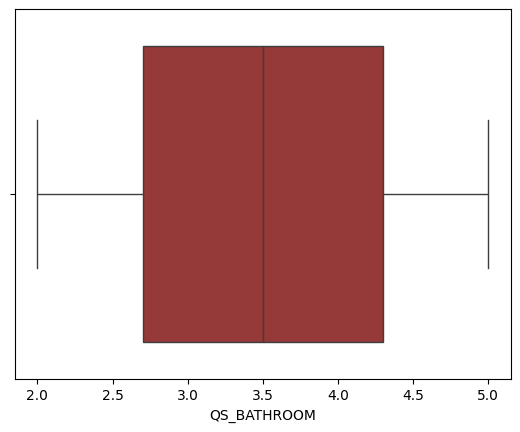

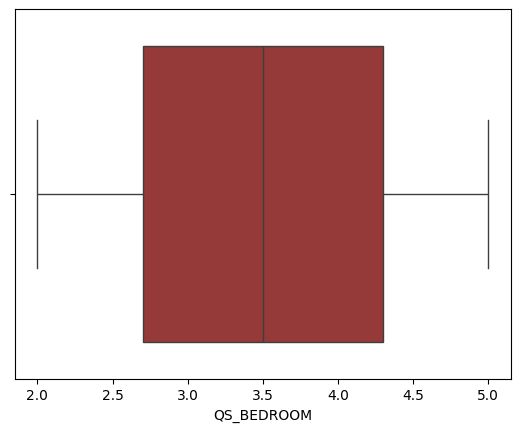

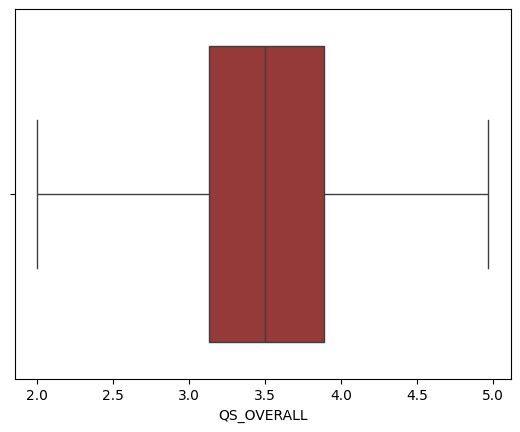

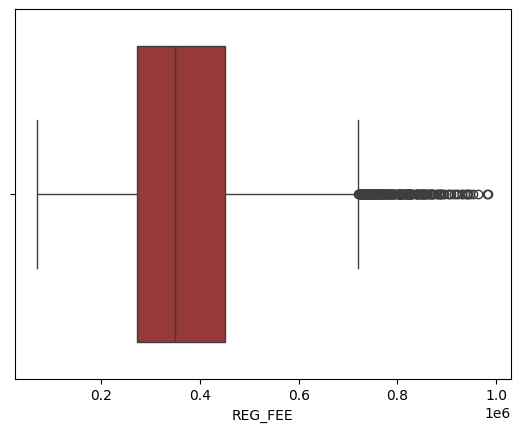

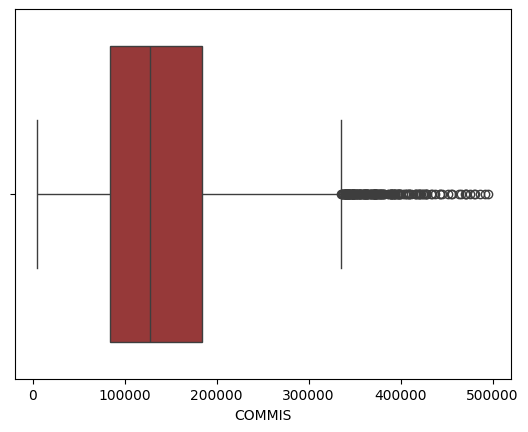

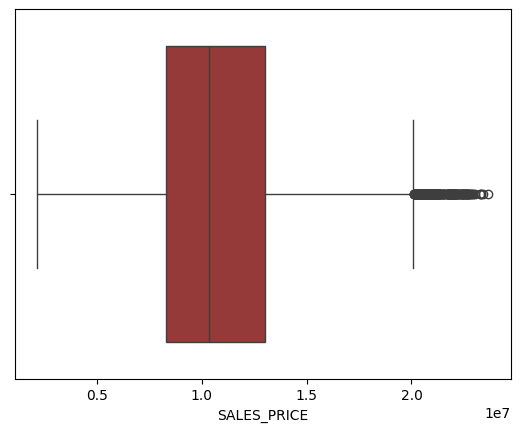

In [73]:
for features in cnum_features:
    sns.boxplot(data,x=features,color='brown')
    plt.show()

## Bivariate analysis

### -- Checking relation between various numeric features with Total_Price --

In [74]:
total_price= data['REG_FEE']+data['COMMIS']+data['SALES_PRICE']

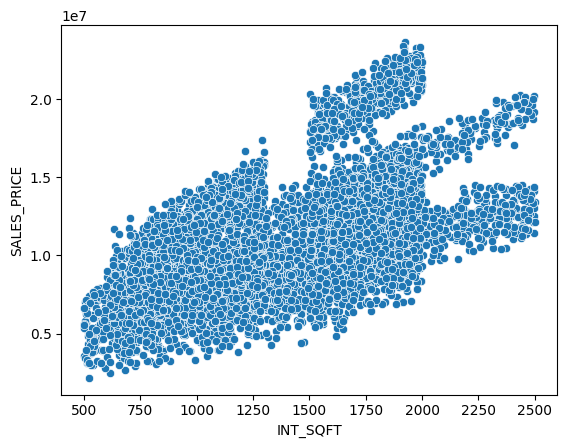

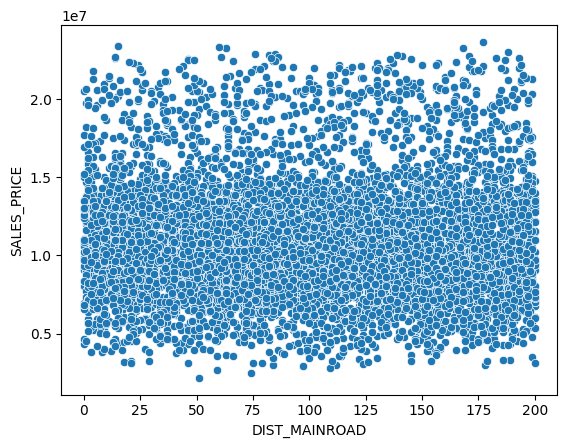

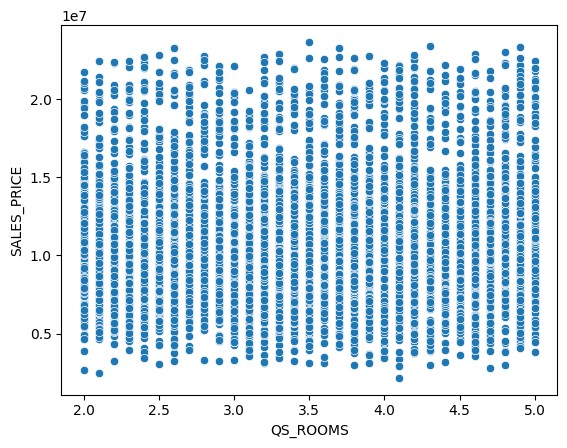

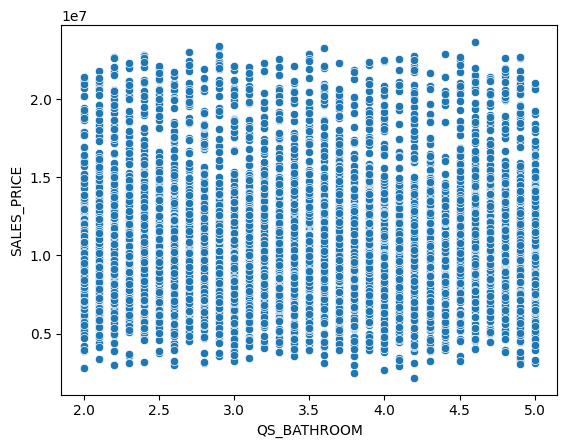

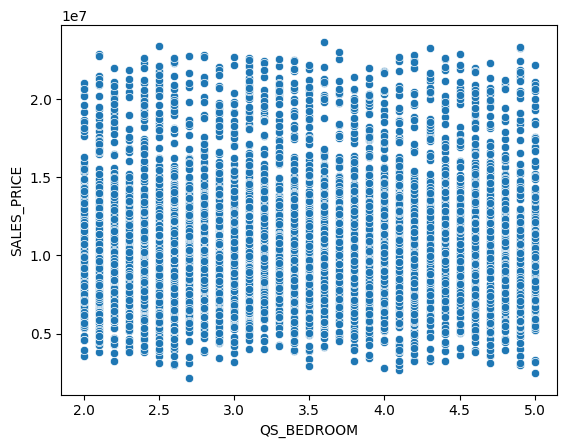

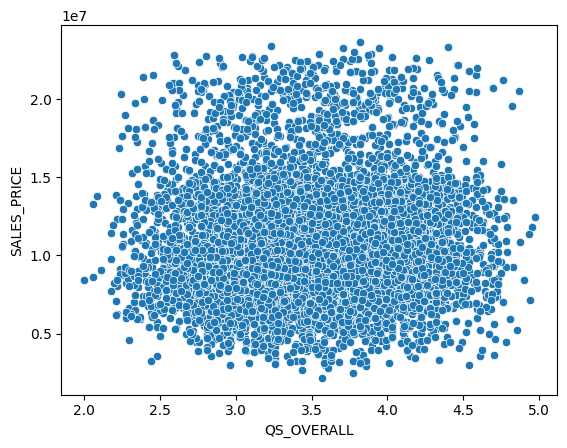

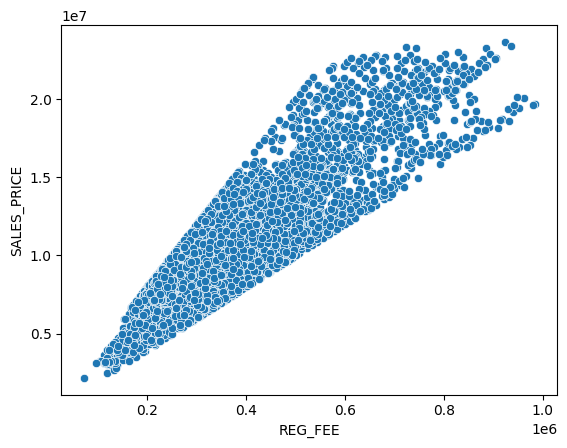

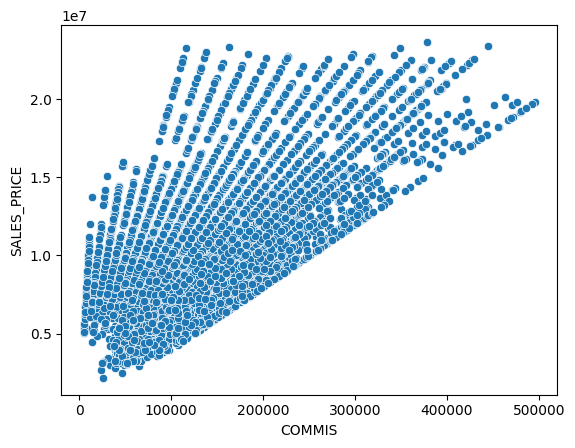

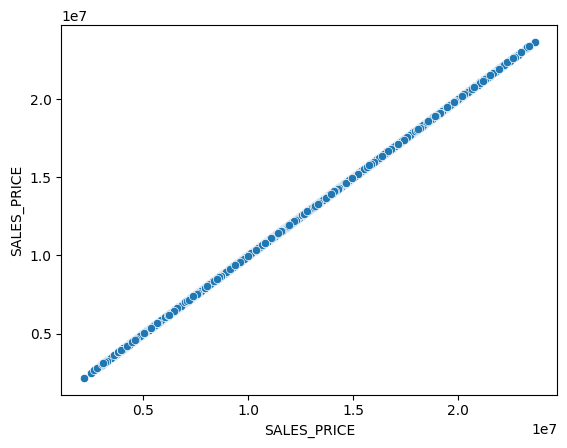

In [75]:
for features in cnum_features:
    sns.scatterplot(data,x=features,y='SALES_PRICE')
    plt.show()

#### INSIGHT:
    - REG_FEE, COMMIS has strong linear correlation with SALES_PRICE feature
    - INT_SQFT also shows a medium level correlation with SALES_PRICE feature

### -- Checking Object Datatype features relation with SALES_PRICE feature --

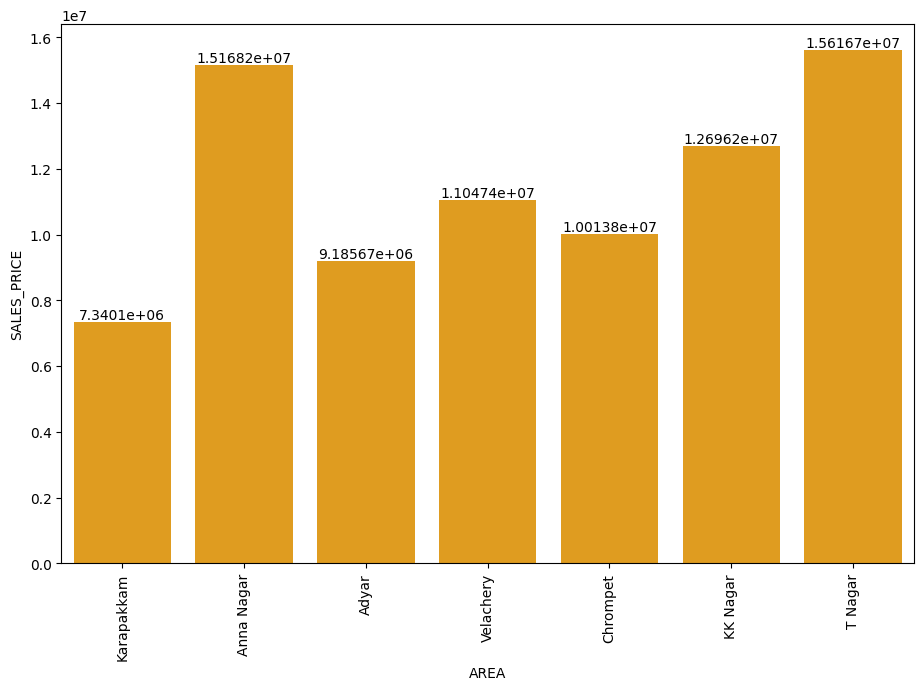

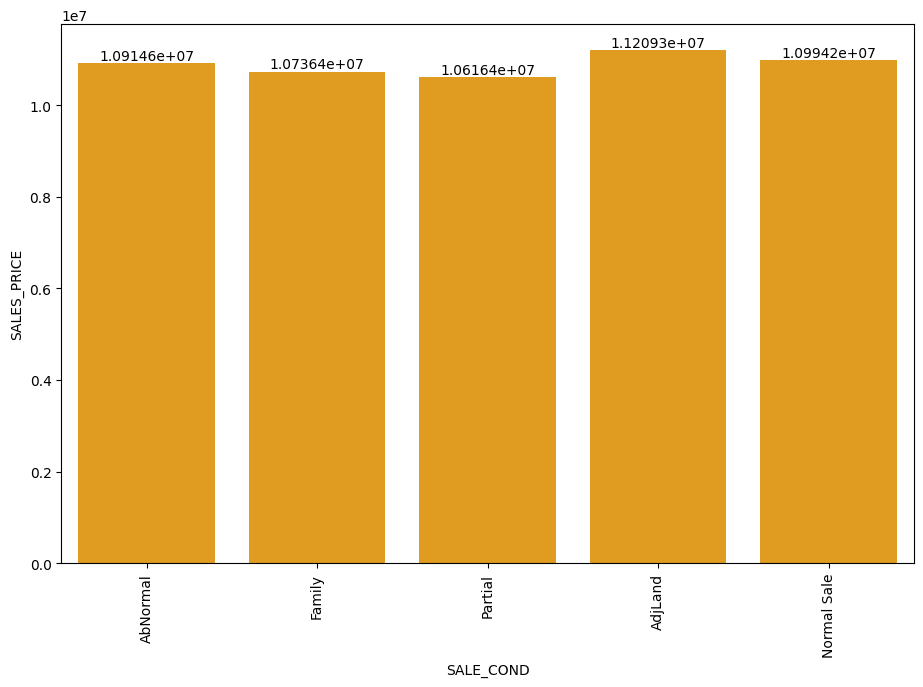

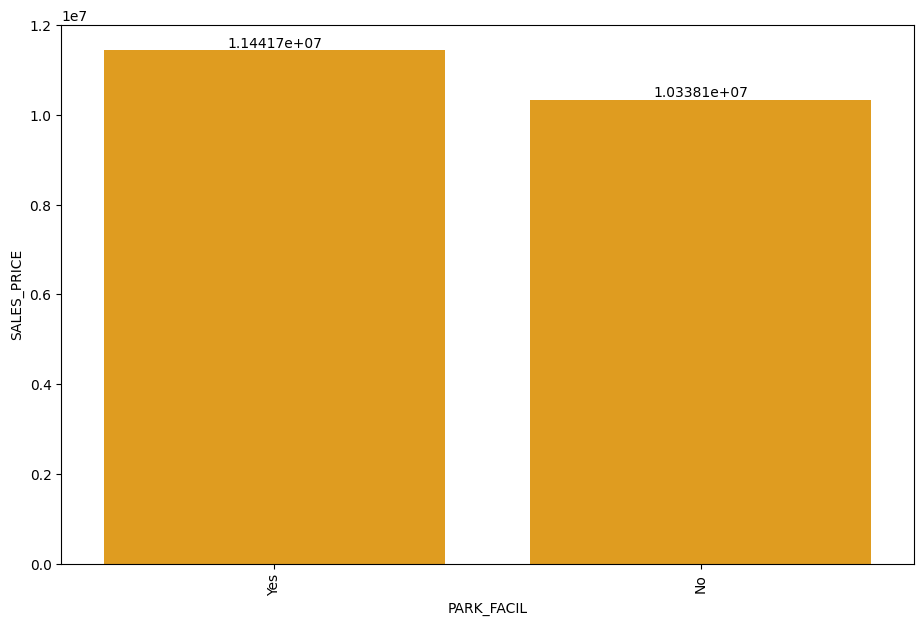

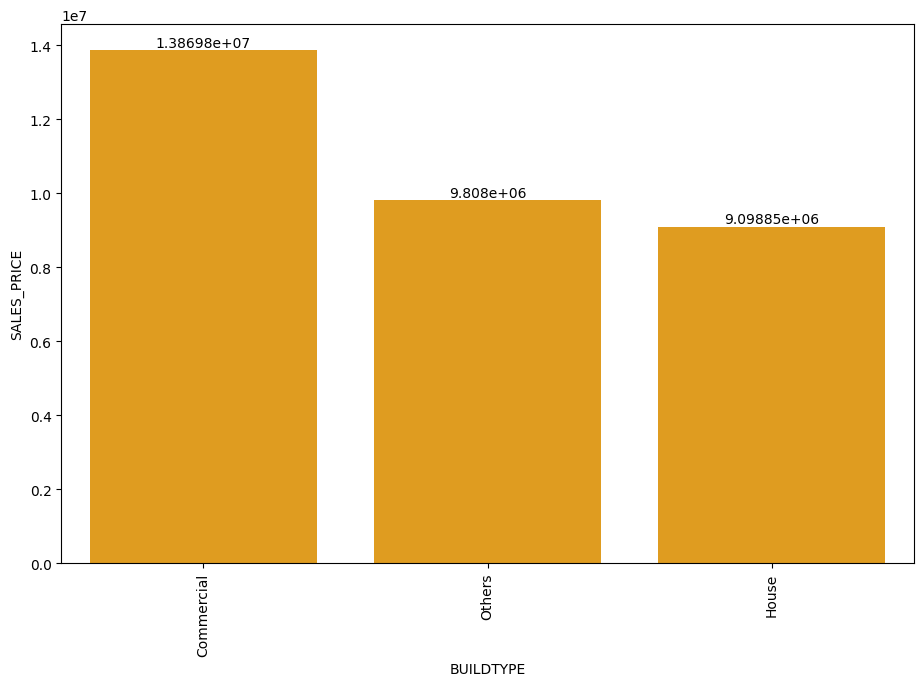

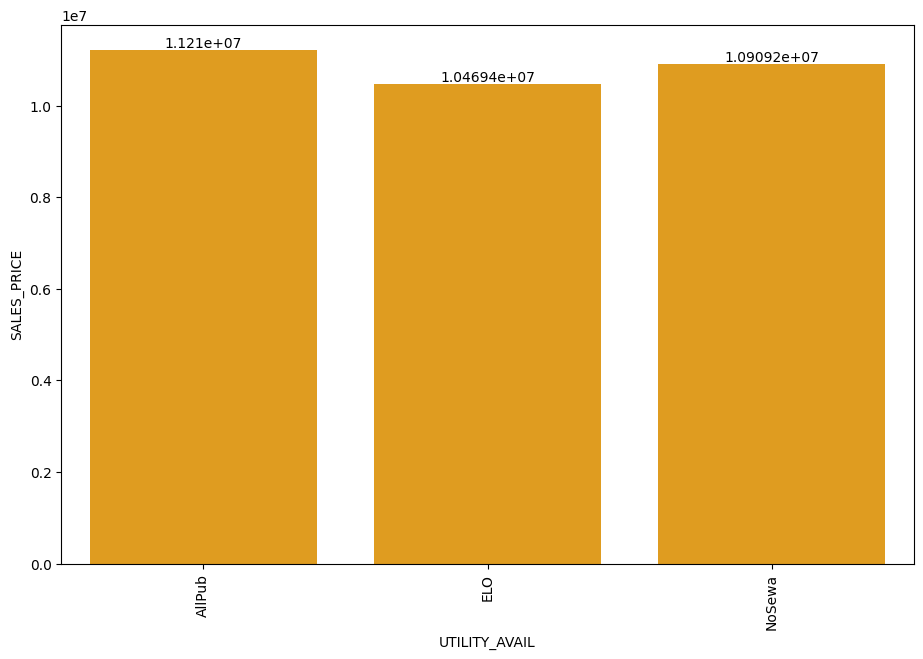

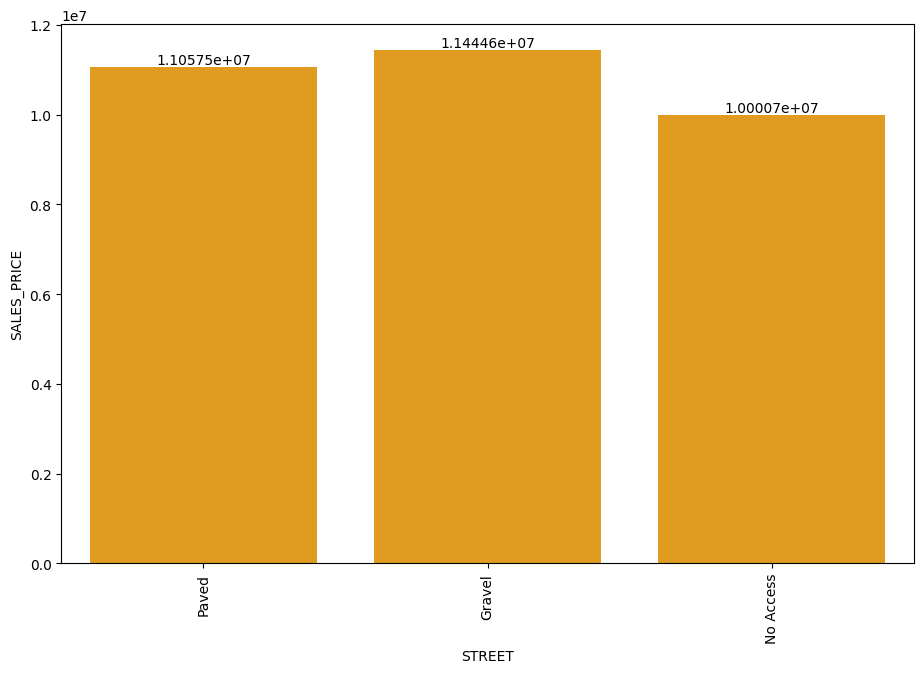

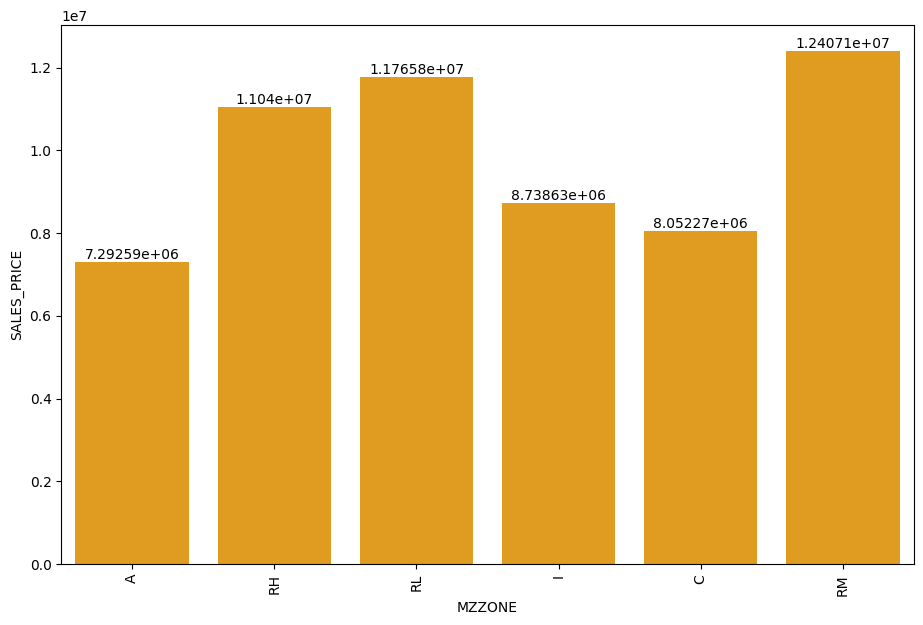

In [76]:
for features in obj_features:
    plt.subplots(figsize=(11,7))
    ax=sns.barplot(data,x=features,y='SALES_PRICE',errorbar=None,color='orange')
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    plt.show()

### -- Checking Numerical categorical features relation with SALES_PRICE feature --

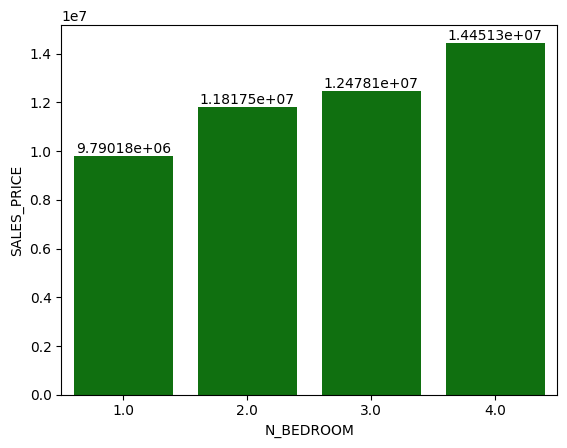

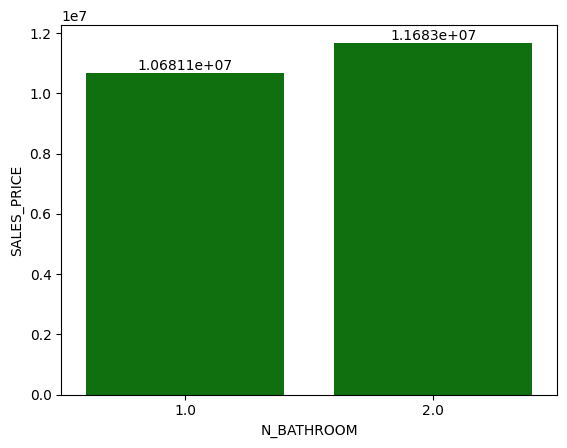

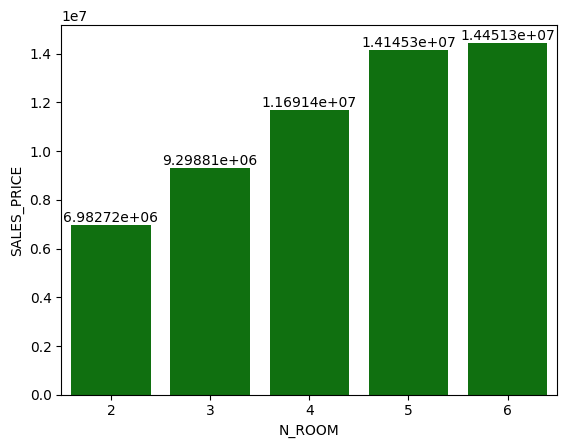

In [77]:
for features in catnum_features:
    ax=sns.barplot(data,x=features,y='SALES_PRICE',color='green',errorbar=None)
    ax.bar_label(ax.containers[0])
    plt.show()

### -- Temporal Data analysis --

In [99]:
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'],format='%d-%M-%Y')

In [103]:
data['HOUSE_AGE']=data['DATE_SALE'].dt.year-data['DATE_BUILD'].dt.year

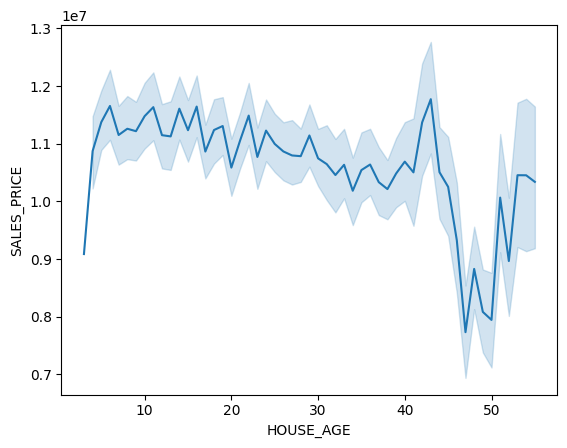

In [106]:
sns.lineplot(data,x='HOUSE_AGE',y='SALES_PRICE')
plt.show()